# K - Means Clustering

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


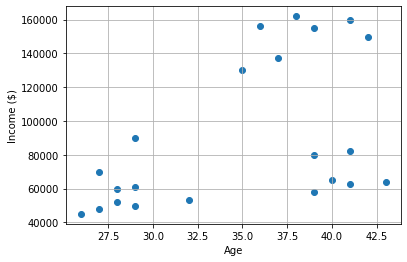

In [3]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.grid()
plt.show()

In [4]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [5]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
km.cluster_centers_ # Centroids

array([[3.29090909e+01, 5.62272727e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

## For Visualisation we have to create 3 data frames

In [8]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

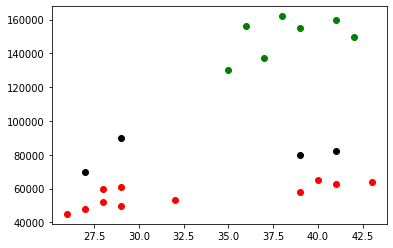

In [9]:
plt.scatter(df1.Age, df1['Income($)'], c = 'r')
plt.scatter(df2.Age, df2['Income($)'], c = 'g')
plt.scatter(df3.Age, df3['Income($)'], c = 'black')
plt.show()

In [10]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [11]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [12]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
km.cluster_centers_ # Centroids

array([[0.1372549 , 0.11728395],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [14]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

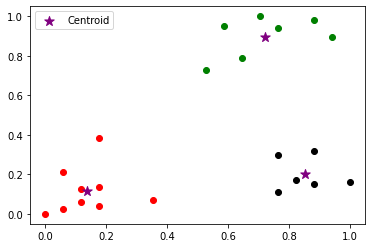

In [15]:
plt.scatter(df1.Age, df1['Income($)'], c = 'r')
plt.scatter(df2.Age, df2['Income($)'], c = 'g')
plt.scatter(df3.Age, df3['Income($)'], c = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'Centroid', s = 100)
plt.legend()
plt.show()

### Sum Of Squared Error

In [16]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # inertia ==> sum of square error

In [17]:
sse

[5.428320147322455,
 2.0900893192759398,
 0.47403128043217174,
 0.3480576400188187,
 0.26202273761644423,
 0.2200530700220169,
 0.17884505744389517,
 0.13214283878673316,
 0.1108997087466907]

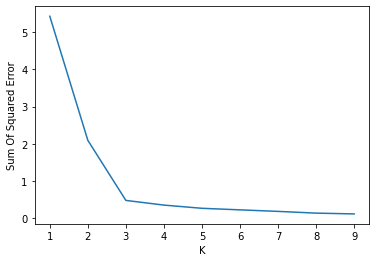

In [18]:
plt.xlabel('K')
plt.ylabel('Sum Of Squared Error')
plt.plot(k_rng, sse)
plt.show()

# Here the elbow is at 3 which is the most appropiate value to start with